## Modules needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

## Loading backed up data

In [2]:
churn_df_details = pickle.load(open('churn_df_details.pkl','rb'))

In [3]:
df = churn_df_details['df']
obj_cols = churn_df_details['obj_cols']
num_cols = churn_df_details['num_cols']

## Data Visualization

In [4]:
plt.rcParams['font.size'] = '14'

### 1) Univariate Analysis

#### A) Numerical

In [ ]:
df.describe(percentiles=[0.1,0.2,0.25,0.5,0.75,0.9,0.95]).T

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(x=df['tenure'],bins=np.arange(0,75,3))
plt.xticks(np.arange(0,75,6))
plt.show()

plt.figure(figsize=(12,4))
sns.histplot(x=df['MonthlyCharges'],bins=np.arange(0,120,10))
plt.xticks(np.arange(0,120,10))
plt.show()

plt.figure(figsize=(12,4))
sns.histplot(x=df['TotalCharges'],bins=np.arange(0,9000,500))
plt.xticks(np.arange(0,9000,1000))
plt.show()

In [ ]:
plt.figure(figsize=(16,4))
ax1,ax2,ax3= [plt.subplot(1,3,i+1) for i in range(3)]
axes = [ax1,ax2,ax3]

for axis, num_col in zip(axes,num_cols): 
    sns.boxplot(x=df[num_col],ax=axis)
#plt.savefig('Outliers_box_plot.jpg')
plt.tight_layout()
plt.show()

- Tenure :: peaks present in 0-6 months (new customers) and 69-72 months (long-term customers), remaining monthly bins nearly equally distributed
- MonthlyCharges :: peak present in 20-30 units and 70-100 units of currency
- TotalCharges :: Heavily left skewed, 50% of the customers have total charges less than 1400 units with the max value of 8684 units

- No outliers present in the numerical variables

#### B) Categorical

In [ ]:
plt.figure(figsize=(16,27))
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18= [plt.subplot(9,2,i+1) for i in range(18)]
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18]

for axis, obj_col in zip(axes,obj_cols): 
    sns.countplot(y=df[obj_col],ax=axis)
    #axis.set_yticklabels(axis.get_yticklabels(),rotation = 30)
    
plt.tight_layout()
#plt.savefig('Outliers_box_plot.jpg')
plt.show()

- Nearly equal % of males and females in the customers
- Most of the customers are not senior citizens and do not have dependents
- Relatively more number of customers do not have partners
- Most of the customers have subscribed to home phone service and in that relatively more number of customers are not subscribed for multiple lines
- More customers are subscibed to Fiber optic followed by DSL. Remaining are not subscribed for Internet Service.
- Most of the customers are not subscribed to Online Security, Online Backup, Device Protection, Streaming TV, Premium Tech Support or Streaming Movies
- Comparatively Streaming TV and Streaming Movies are the most subscribed services
- 55% of the customers are subscribed based on month to month contract
- 59% of the customers have chosen Paperless billing
- Most of the customers pays their bill through electronic check
- 26% of the customers have left the company (churn) this quarter

### 2) Bivariate Analysis

#### A) Between numerical variables

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
corre = df.corr()
sns.heatmap(corre,annot=True,cmap='seismic',vmin=-0.8,vmax=0.8,mask=np.triu(corre))
plt.show()

- High multicollinearity existing on the total charges variable with tenure and monthly charges

#### B) Numerical vs Categorical

In [ ]:
def numvscat(column):
    plt.figure(figsize=(16,27))
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18= [plt.subplot(9,2,i+1) for i in range(18)]
    axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18]

    for axis, obj_col in zip(axes,obj_cols): 
        sns.barplot(x=df[column],y=df[obj_col],ax=axis)
        #axis.set_yticklabels(axis.get_yticklabels(),rotation = 30)

    plt.tight_layout()
    #plt.savefig('Outliers_box_plot.jpg')
    plt.show()

##### 1. Tenure

In [ ]:
numvscat('tenure')

##### Average Tenure is relatively high for the customers 
- who are married or have dependendents
- who have subscribed for muliple lines or internet sevice
- who have opted for the other premium services
- who have subscribed based on Two year contract
- who pay bills automatically through bank transaction or credit card
- for obvious reasons, who do not churn

##### 2. Monthly Charges

In [ ]:
numvscat('MonthlyCharges')

##### Average Monthly Charges is relatively high for the customers 
- who are married or senior citizens
- who do not have dependents, surprisingly!
- who have subscribed for phone service or fiber optic internet sevice or muliple telephone lines 
- who have opted for the other premium services
- who have subscribed based on month to month contract
- who opt for paperless billing
- who pay bills using electronic check
- who left the company this quarter, again surprisingly!!

##### 3. TotalCharges

In [ ]:
numvscat('TotalCharges')

##### Average Total Charges is relatively high for the customers 
- who are married or senior citizens or have dependents
- who have subscribed for phone service or fiber optic internet sevice or muliple telephone lines 
- who have opted for the other premium services
- who have subscribed based on two year contract
- who opt for paperless billing
- who pay bills automatically through bank transaction or credit card
- for obvious reasons, who do not churn

#### C)  Categorical vs Numerical

In [ ]:
print(obj_cols)

In [ ]:
def catvsnum(column):
    plt.figure(figsize=(18,4))
    ax1,ax2,ax3= [plt.subplot(1,3,i+1) for i in range(3)]
    axes = [ax1,ax2,ax3]

    for axis, num_col in zip(axes,num_cols): 
        sns.barplot(y=df[column],x=df[num_col],ax=axis)

    #plt.savefig('Outliers_box_plot.jpg')
    plt.tight_layout()
    plt.show()

##### 1. gender

In [ ]:
catvsnum('gender')

- No distinction in numerical variables based on the gender of the customer

##### 2. SeniorCitizen

In [ ]:
catvsnum('SeniorCitizen')

- Though there is no distinction in avg tenure, avg Monthly Charges and avg Total Charges are high for senior citizens

##### 3. Partner

In [ ]:
catvsnum('Partner')

- Avg Tenure, avg Monthly Charges and avg Total Charges are high for customers who are married

##### 4. Dependents

In [ ]:
catvsnum('Dependents')

- Avg Montly charges are high for customers who do not have dependents
- Avg Tenure and avg Total Charges are high for customers who have dependents

##### 5. PhoneService

In [ ]:
catvsnum('PhoneService')

- Though there is no distinction in avg tenure, avg Monthly Charges and avg Total Charges are high for customers who are subscribed to phone service

##### 6. MultipleLines

In [ ]:
catvsnum('MultipleLines')

- Avg Tenure and Avg Total charges is the least for the customers who have subscribed for phone service but not for Multiple telephone lines
- Avg Tenure, avg Monthly Charges and avg Total Charges are high for customers who have subscribed for Multiple telephone lines

##### 7. InternetService

In [ ]:
catvsnum('InternetService')

- Average tenure is high for the customers who have suscribed for Internet service
- Average Monthly charges and Total charges are high for customers who opted for Fiber optic followed by DSL

##### 8. OnlineSecurity

In [ ]:
catvsnum('OnlineSecurity')

- Avg Tenure is the least for the customers who have subscribed for internet service but not for Online Security
- Avg Tenure and avg Total Charges are high for customers who have subscribed for Online Security
- Avg Monthly Charges is high for customers who have opted for internet service

##### 9. OnlineBackup

In [ ]:
catvsnum('OnlineBackup')

- Avg Tenure is the least for the customers who have subscribed for internet service but not for Online Backup
- Avg Tenure, avg Monthly Charges and avg Total Charges are high for customers who have subscribed for Online Backup

##### 10. DeviceProtection

In [ ]:
catvsnum('DeviceProtection')

- Avg Tenure is the least for the customers who have subscribed for internet service but not for Device protection
- Avg Tenure, avg Monthly Charges and avg Total Charges are high for customers who have subscribed for Device protection

##### 11. TechSupport

In [ ]:
catvsnum('TechSupport')

- Avg Tenure is the least for the customers who have subscribed for internet service but not for Premium Tech Support
- Avg Tenure, avg Monthly Charges and avg Total Charges are high for customers who have subscribed for Premium Tech Support

##### 12. StreamingTV

In [ ]:
catvsnum('StreamingTV')

- Avg Tenure is the least for the customers who have subscribed for internet service but not for Streaming TV
- Avg Tenure, avg Monthly Charges and avg Total Charges are high for customers who have subscribed for Streaming TV

##### 13. StreamingMovies

In [ ]:
catvsnum('StreamingMovies')

- Avg Tenure is the least for the customers who have subscribed for internet service but not for Streaming Movies
- Avg Tenure, avg Monthly Charges and avg Total Charges are high for customers who have subscribed for Streaming Movies

##### 14. Contract

In [ ]:
catvsnum('Contract')

- Avg Tenure and avg Total Charges for customers based on their contract in the following order : Two year > One year > Month-to-month
- Avg Monthly Charges is high for customers who have subscribed based on Month-to-month or One year contract

##### 15. PaperlessBilling

In [ ]:
catvsnum('PaperlessBilling')

- Though there is no distinction in avg tenure, avg Monthly Charges and avg Total Charges are high for customers who opted for Paperless billing

##### 16. PaymentMethod

In [ ]:
catvsnum('PaymentMethod')

- Avg Tenure and avg Total Charges for customers based on their payment order in the following order : Automatic(Bank transfer/Credit Card) > Electronic check > Mailed check
- avg Monthly Charges for customers based on their payment order in the following order : Electronic check > Automatic(Bank transfer/Credit Card) > Mailed check

#### D)  Categorical vs Categorical

In [ ]:
def catvscat(column):
    temp_obj_cols = obj_cols.copy()
    temp_obj_cols.remove(column)

    plt.figure(figsize=(24,24))
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16= [plt.subplot(8,2,i+1) for i in range(16)]
    axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16]

    for axis, obj_col in zip(axes,temp_obj_cols): 
        cross_tab_prop = pd.crosstab(df[column],df[obj_col],normalize='index')
        cross_tab_prop.plot(kind='barh',stacked=True,ax=axis)
        axis.legend(loc="center",ncol=1,fontsize='x-small',bbox_to_anchor=(1.15, 0.8))
        axis.set_xlabel(f'Ratio of {obj_col}')
        
        #sns.countplot(y=df[column],hue=df[obj_col],ax=axis)

    #plt.savefig('Outliers_box_plot.jpg')
    plt.tight_layout()
    plt.show()

##### 1. gender

In [ ]:
catvscat('gender')

- No distinction based on gender in any of the categorical variables

##### 2. SeniorCitizen

In [ ]:
catvscat('SeniorCitizen')

For customers who are **SeniorCitizens**,
- the ratio of dependents are high
- the ratio of subscription to Multiple telephone lines is high
- the ratio of subscription to Fiber optic Internet Service is high
- the ratio of subscription to premium services such as OnlineBackup, DeviceProtection, StreamingTV and StreamingMovies are high where to OnlineSecurity and PremiumTechSupport are low
- ratio of Month-to-month contract is high
- ratio of Paperless Billing is high
- ratio of payment by Electronic Check is high
- ratio of **churn rate** is high

##### 3. Partner

In [ ]:
catvscat('Partner')

For customers who are **married**,
- the ratio of dependents are high
- the ratio of subscription to Multiple telephone lines is high
- the ratio of subscription to all the premium services are high
- ratio of Two year contract is high
- ratio of automatic payment(Bank-transfer/Credit-card) is high

For customers who are **not married**,
- ratio of **churn rate** is high

##### 4. Dependents

In [ ]:
catvscat('Dependents')

For customers who lives with any **dependents**,
- the ratio of martial status being married is high
- the ratio of subscription to all the premium services except StreamingTV and StreamingMovies are high
- ratio of Two year contract is high
- ratio of automatic payment(Bank-transfer/Credit-card) is high

For customers who lives with any **dependents**,
- the ratio of senior citizens is high
- the ratio of subscription to fiber optic internet service is high
- the ratio of opting to Paperless billing is high
- ratio of **churn rate** is high

##### 5. PhoneService

In [ ]:
catvscat('PhoneService')

For customers who have subscribed for **Phone Service**,
- the ratio of martial status being married is high

For customers who have **not** subscribed for **Phone Service**,
- but subscribed for internet service, all of them use DSL internet service
- the ratio of subscription to premium services is constant across

##### 6. MultipleLines

In [ ]:
catvscat('MultipleLines')

For customers who are subscribed with **multiple telephone lines**,
- the ratio of senior citizens is high
- the ratio of martial status being married is high
- the ratio of subscription to fiber optic internet service is high
- the ratio of subscription to all the premium services except StreamingTV and StreamingMovies are high
- ratio of Two year contract is high
- the ratio of opting to Paperless billing is high
- ratio of automatic payment(Bank-transfer/Credit-card) is high

For customers who are **not** subscribed with **multiple telephone lines**,
- ratio of payment through mailed check is high

##### 7. InternetService

In [ ]:
catvscat('InternetService')

1) Fiber optic > DSL > No internet service
- the ratio of senior citizens
- the ratio of customers with dependents
- the ratio of subscription to multiple telephone lines
- the ratio of **Month-to-month** contract
- the ratio of payment method by **Electronic check**
- the ratio of subscription to **paperless billing** and 
- the ratio of **churn rate**

2) Fiber optic > DSL
- the ratio of subscription to all the premium services such as StreamingTV and StreamingMovies

3) DSL > No internet service > Fiber optic
- the ratio of **automatic payment** method

4) DSL > Fiber optic
- the ratio of subscription to all the premium services such as OnlineSecurity and premium Tech support

5) No internet service > DSL > Fiber optic
- the ratio of **two year** contract
- the ratio of payment method by **mailed check** 

Other inferences
- All the customers who are subscribed for **InternetService** with **Fiber-optic** are subscribed to phone service 
- Some of the customers who are subscribed for **InternetService** with **DSL** do not have subscription to phone service

##### 8. OnlineSecurity

In [ ]:
catvscat('OnlineSecurity')

For customers who are subscribed for **OnlineSecurity**,
- the ratio of martial status as married is high
- the ratio of living with dependents is high
- the ratio of subscription to the premium services such as OnlineBackup, DeviceProtection and premium Tech support are high
- the ratio of two year contract mode is high
- the ratio of automatic payment is high

For customers who are **not** subscribed for **OnlineSecurity**,
- the ratio of senior citizens is high
- the ratio of subscription to internet service by Fiber-optic is high
- the ratio of Month-to-month contract mode is high
- the ratio of subscription to Paperless billing is high
- the ratio of payment by Electronic check is high
- the ratio of **churn rate** is high

##### 9. OnlineBackup

In [ ]:
catvscat('OnlineBackup')

For customers who are subscribed for **OnlineBackup**,
- the ratio of martial status as married is high
- the ratio of living with dependents is high
- the ratio of subscription to all the premium services are high
- the ratio of two year contract mode is high
- the ratio of automatic payment is high

For customers who are **not** subscribed for **OnlineBackup**,
- the ratio of Month-to-month contract mode is high
- the ratio of payment by Electronic check is high
- the ratio of **churn rate** is high

##### 10. DeviceProtection

In [ ]:
catvscat('DeviceProtection')

For customers who are subscribed for **DeviceProtection**,
- the ratio of martial status as married is high
- the ratio of living with dependents is high
- the ratio of subscription to multiple telephone lines is high
- the ratio of subscription to all the premium services are high
- the ratio of two year contract mode is high
- the ratio of automatic payment is high

For customers who are **not** subscribed for **DeviceProtection**,
- the ratio of Month-to-month contract mode is high
- the ratio of payment by Electronic check is high
- the ratio of **churn rate** is high

##### 11. TechSupport

In [ ]:
catvscat('TechSupport')

For customers who are subscribed for **Premium TechSupport**,
- the ratio of martial status as married is high
- the ratio of living with dependents is high
- the ratio of subscription to all the premium services are high
- the ratio of two year contract mode is high
- the ratio of automatic payment is high

For customers who are **not** subscribed for **Premium TechSupport**,
- the ratio of senior citizens is high
- the ratio of subscription internet service with Fiber-optic is high
- the ratio of Month-to-month contract mode is high
- the ratio of subscription to paperless billing is high
- the ratio of payment by Electronic check is high
- the ratio of **churn rate** is high

##### 12. StreamingTV

In [ ]:
catvscat('StreamingTV')

For customers who are subscribed for **StreamingTV**,
- the ratio of martial status as married is high
- the ratio of subscription to multiple telephone lines is high
- the ratio of subscription internet service with Fiber-optic is high
- the ratio of subscription to all the premium services are high
- the ratio of two year contract mode is high
- the ratio of subscription to paperless billing is high
- the ratio of automatic payment is high

For customers who are **not** subscribed for **StreamingTV**,
- the ratio of Month-to-month contract mode is high
- the ratio of **churn rate** is high

##### 13. StreamingMovies

In [ ]:
catvscat('StreamingMovies')

For customers who are subscribed for **StreamingMovies**,
- the ratio of senior citizens is high
- the ratio of martial status as married is high
- the ratio of subscription to multiple telephone lines is high
- the ratio of subscription internet service with Fiber-optic is high
- the ratio of subscription to all the premium services are high
- the ratio of two year contract mode is high
- the ratio of subscription to paperless billing is high
- the ratio of automatic payment is high

For customers who are **not** subscribed for **StreamingMovies**,
- the ratio of Month-to-month contract mode is high
- the ratio of **churn rate** is high

##### 14. Contract

In [ ]:
catvscat('Contract')

1) Two year > One year > Month-to-month
- the ratio of **senior citizens** customers
- the ratio of subscription to **multiple telephone** lines
- the ratio of subscription to the premium services such as Device Protection and premium TechSupport
- the ratio of using **automatic payment** method

2) Two year = One year > Month-to-month 
- the ratio of subscription to the premium services such as Online Backup, StreamingTV and StreamingMovies

3) Month-to-month > One year > Two year
- the ratio of customers living with **dependents**
- the ratio of **married** customers
- the ratio of internet service using **Fiber optic**
- the ratio of subscription to **paperless billing**
- the ratio of payment by **electronic check**
- the ratio of **churn rate** is high

##### 15. PaperlessBilling

In [ ]:
catvscat('PaperlessBilling')

For customers who are subscribed for **PaperlessBilling**,
- the ratio of senior citizens is high
- the ratio of subscription to multiple telephone lines is high
- the ratio of subscription internet service with Fiber-optic is high
- the ratio of subscription to all the premium services except OnlineSecurity are high
- the ratio of Month-to-month contract mode is high
- the ratio of payment by electronic check is high
- the ratio of **churn rate** is high

For customers who are **not** subscribed for **PaperlessBilling**,
- the ratio of customers with dependents is high
- the ratio of non subscription to internet service is high
- the ratio of two year contract mode is high
- the ratio of payment by mail check is high

##### 16. PaymentMethod

In [ ]:
catvscat('PaymentMethod')

1) Electronic > Automatic > Mail
- the ratio of **married** customers
- the ratio of internet service using **Fiber optic**
- the ratio of subscription to the premium services such as StreamingTV and StreamingMovies
- the ratio of subscription to **paperless billing**

2) Electronic > Mail > Automatic
- the ratio of **Month-to-month** contract mode

3) Automatic > Electronic > Mail
- the ratio of **senior citizen** customers
- the ratio of subscription to the premium services such as OnlineBackup and DeviceProtection

4) Automatic > Mail > Electronic
- the ratio of **Two year** contract mode

5) Automatic > Manual
- the ratio of subscription to the premium services such as OnlineSecurity and premium TechSupport

Other inferences
- the ratio of customers living with **dependents** is low for those who pay with **Electronic check**
- the ratio of **churn rate** is high for customers who pay with **Electronic check**
- the ratio of subscription to **multiple telephone** lines is low for those who pay with **Mailed check**

### E) Against Target Variable

##### 1) Numerical Variables

In [ ]:
catvsnum('Churn')

For customers who churn
- Average tenure and average total charges is low
- But, Average monthly charges is high

##### 2) Categorical Variables

In [ ]:
catvscat('Churn')

For customers who **left (churn)** company this quarter,
- the ratio of senior citizens is high
- the ratio of subscription internet service with Fiber-optic is high
- the ratio of subscription to the premium non streaming services are **low**
- the ratio of Month-to-month contract mode is high
- the ratio of subscription to paperless billing is high
- the ratio of payment by Electronic check is high

For customers who have **not left** company this quarter,
- the ratio of martial status as married is high
- the ratio of customers with dependents
- the ratio of two year contract mode is high
- the ratio of automatic payment and mailed check is high

### 3) Multivariate analysis

#### A) Between numerical vs target

In [ ]:
sns.pairplot(df,hue='Churn')

#### B) Num vs Cat vs Target

In [ ]:
imp_cols_cat = ['SeniorCitizen','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                'Contract', 'PaperlessBilling', 'PaymentMethod']

In [5]:
def catvsnum_hued(x_col,y_col,hue_col):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[y_col],x=df[x_col],hue=df[hue_col])
    plt.legend(bbox_to_anchor=(1,1))

    #plt.savefig('Outliers_box_plot.jpg')
    plt.show()

#### 1) tenure

In [ ]:
for y_col in obj_cols:
    catvsnum_hued('tenure',y_col,'Churn')

For customers who churn
- Median tenure is **high** only for those who are following one year / two year based contract
- Median tenure is **less** for all the remaining cases

#### 2) MonthlyCharges

In [ ]:
for y_col in obj_cols:
    catvsnum_hued('MonthlyCharges',y_col,'Churn')

For customers who churn Median monthly charges,
- 1) is low for those 
  - who are not subscribed to PhoneService 
  - who are subscribed to InternetService
- 2) is high for remaining all scenerios

#### 3) TotalCharges

In [ ]:
for y_col in obj_cols:
    catvsnum_hued('TotalCharges',y_col,'Churn')

For customers who churn Median Total charges,
- 1) is high for those who were following one year or two year contract
- 2) is high for remaining all scenerios

#### C)  Cat vs Num vs Target

##### 1. gender

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'gender','Churn')

##### 2. SeniorCitizen

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'SeniorCitizen','Churn')

##### 3. Partner

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'Partner','Churn')

##### 4. Dependents

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'Dependents','Churn')

##### 5. PhoneService

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'PhoneService','Churn')

##### 6. MultipleLines

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'MultipleLines','Churn')

For the customers who churned
- Median **MonthlyCharges** is high for those who are subscribed to the **PhoneService** irrespective of whether they are **multiple telephone lines**

##### 7. InternetService

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'InternetService','Churn')

##### 8. OnlineSecurity

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'OnlineSecurity','Churn')

For the customers who churned
- Median **MonthlyCharges** is high for those who are subscribed to the **InternetService** irrespective of subscription to **OnlineSecurity**

##### 9. OnlineBackup

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'OnlineBackup','Churn')

##### 10. DeviceProtection

In [ ]:
- Median **MonthlyCharges** is high for those who are subscribed to the **PhoneService** and then **churned**for x_col in num_cols:
    catvsnum_hued(x_col,'DeviceProtection','Churn')

##### 11. TechSupport

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'TechSupport','Churn')

##### 12. StreamingTV

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'StreamingTV','Churn')

##### 13. StreamingMovies

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'StreamingMovies','Churn')

For the customers who churned
- Median **MonthlyCharges** is high for those who are subscribed to the **InternetService** irrespective of whether they have subscribed for any of the **Premium service** 

##### 14. Contract

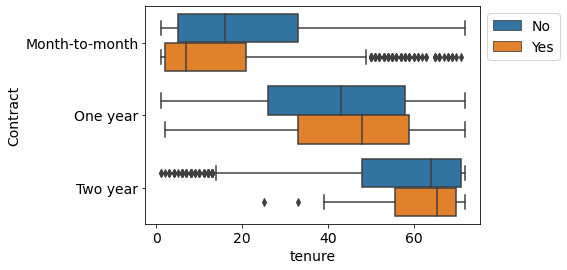

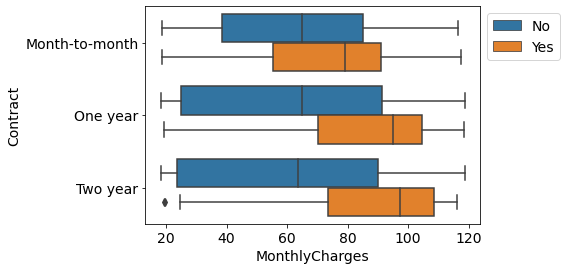

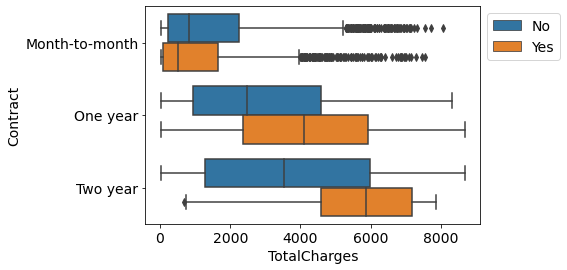

In [25]:
for x_col in num_cols:
    catvsnum_hued(x_col,'Contract','Churn')

For the customers who churned
- median tenure is **high** for those who had **one year** and **two year** contract
- median total charges is **less** for those who had **Month-to-month** contract 

##### 15. PaperlessBilling

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'PaperlessBilling','Churn')

##### 16. PaymentMethod

In [ ]:
for x_col in num_cols:
    catvsnum_hued(x_col,'PaymentMethod','Churn')

#### D) Between Categorical vs Target

In [33]:
def catvscat_hued_act(cat_col_1, cat_col_2, target): 
    a, b = cat_col_1, cat_col_2
    ab = a+'_'+b
    col_name = target+'_perc'
    
    df_groupby = df.groupby([a,b])[target].value_counts().mul(100).rename(col_name).reset_index()
    df_groupby.insert(0,ab,df_groupby[a] + '_' + df_groupby[b])
    df_groupby.drop(columns=[a,b],inplace=True)
    cross_tab_prop = pd.crosstab(index=df_groupby[ab],columns=df_groupby[target],values=df_groupby[col_name],aggfunc=np.sum,normalize='index')
    
    cross_tab_prop.plot(kind='barh',stacked=True)
    plt.legend(loc="center",ncol=1,fontsize='x-small',bbox_to_anchor=(1.15, 0.8))
    plt.xlabel(f'Ratio of {col_name}')
    #plt.savefig('Outliers_box_plot.jpg')
    plt.show()

def catvscat_hued(imp_cols_cat,focus_col,target_col):
    temp_obj_cols = imp_cols_cat.copy()
    temp_obj_cols.remove(focus_col)
    temp_obj_cols.remove(target_col)
    for col in temp_obj_cols:
        catvscat_hued_act(col,focus_col,target_col)

##### 1. gender

In [ ]:
catvscat_hued(obj_cols,'gender','Churn')

Irrespective of gender, Churn percentage is high for those who
- seniorcitizens 
- are **not married**
- do not have dependents
- subscribed to Fiber optic
- **not subscribed** to any non-streaming premium service
- had Month-to-month contract
- opted Paperless Billing
- paid through Electronic check

##### 2. SeniorCitizen

In [ ]:
catvscat_hued(obj_cols,'SeniorCitizen','Churn')

Irrespective of whether customer is seniorcitizen or not, churn rate is high for those who
- are subscribed to Fiber optic InternetService
- are not subscribed to any other non-streaming premium services
- had Month-to-month contract
- paid through Electronic check

Churn percentage is high for seniorcitizens
- 1) irrespective of 
    - gender 
    - subscription to PhoneService or Multiple telephone lines
    - subscription to streaming premium services
- 2) Who
    - are not married
    - do not have dependents    
    - opted Paperless Billing
    - paid through Mailed check

##### 3. Partner

In [ ]:
catvscat_hued(obj_cols,'Partner','Churn')

Irrespective of whether customer is married or not, churn rate is high for those who
- are subscribed to Fiber optic InternetService
- are not subscribed to any other non-streaming premium services
- had Month-to-month contract
- paid through Electronic check

Churn percentage is high for unmarried customers
- 1) irrespective of 
    - gender 
    - subscription to PhoneService or multiple telephone lines
    - subscription to any other streaming premium services
- 2) Who
    - are seniorcitizens
    - do not have dependents
    - opted Paperless Billing

##### 4. Dependents

In [ ]:
catvscat_hued(obj_cols,'Dependents','Churn')

Irrespective of whether customer is living with dependents or not, churn rate is high for those who
- are subscribed to Fiber optic InternetService
- are not subscribed to any other non-streaming premium services
- had Month-to-month contract
- paid through Electronic check

Churn percentage is high for customers without dependents
- 1) irrespective of 
    - gender 
    - subscription to Phone Serive or multiple telephone services
- 2) Who
    - are seniorcitizens
    - are not married
    - opted Paperless Billing
    - paid through Electronic check

##### 5. PhoneService

In [ ]:
catvscat_hued(obj_cols,'PhoneService','Churn')

Irrespective of whether customer has subscription to PhoneService or not, churn rate is high for those who
- are SeniorCitizens
- are not married
- do not have dependents
- are not subscribed to any other non-streaming premium services
- had Month-to-month contract
- opted Paperless Billing
- paid through Electronic check

Churn percentage is high for customers without PhoneService
- 1) irrespective of 
    - subscription to any other streaming premium service
- 2) Who
    - are subscribed to Fiber optic InternetService

##### 6. MultipleLines

In [ ]:
catvscat_hued(obj_cols,'MultipleLines','Churn')

Irrespective of whether customer have multiple telephone lines or not, churn rate is high for those who
- are SeniorCitizens
- are not married
- do not have dependents
- are subscribed to Fiber optic InternetService
- are not subscribed to any other non-streaming premium services
- had Month-to-month contract
- opted Paperless Billing
- paid through Electronic check

##### 7. InternetService

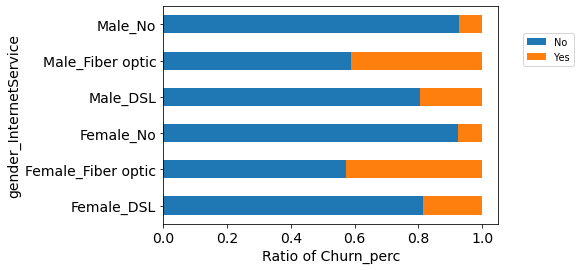

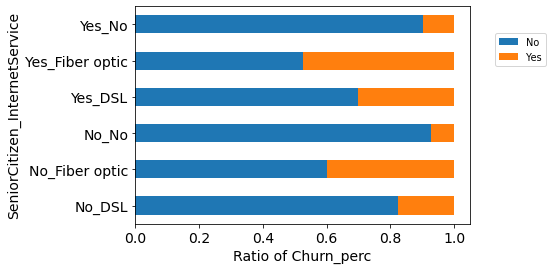

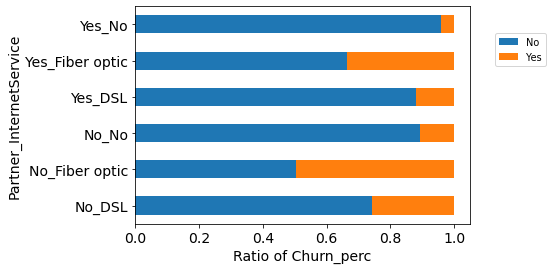

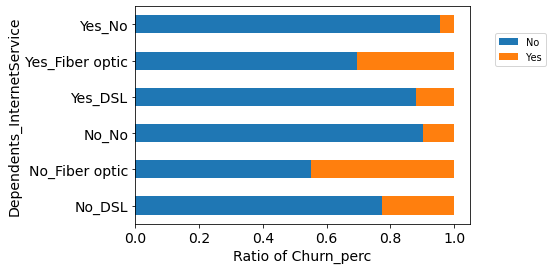

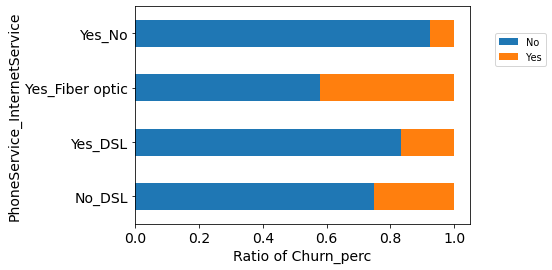

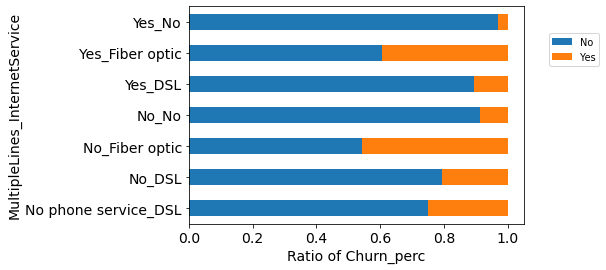

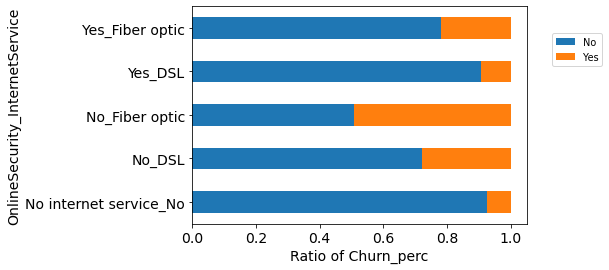

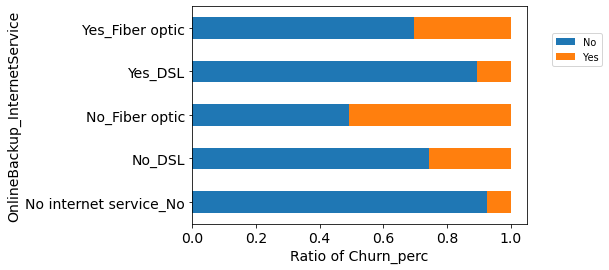

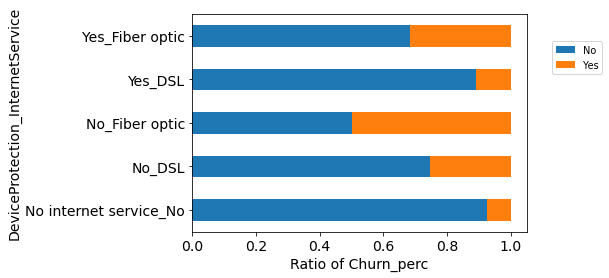

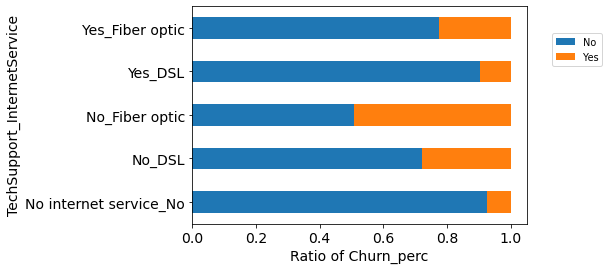

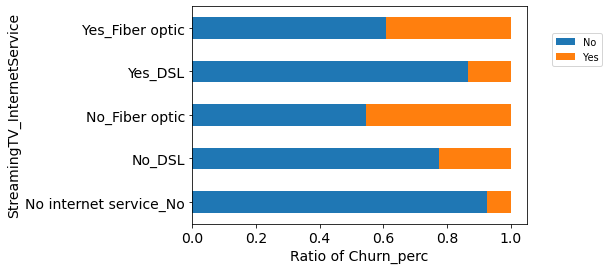

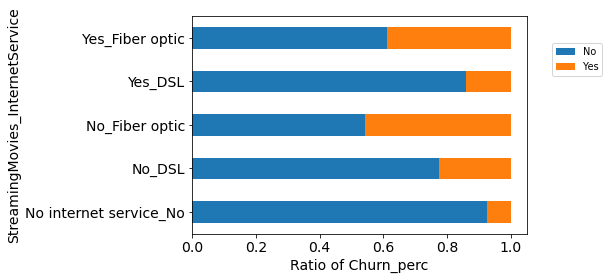

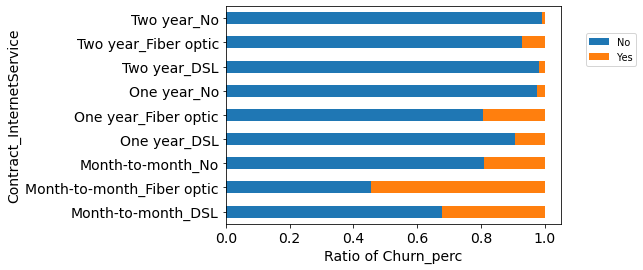

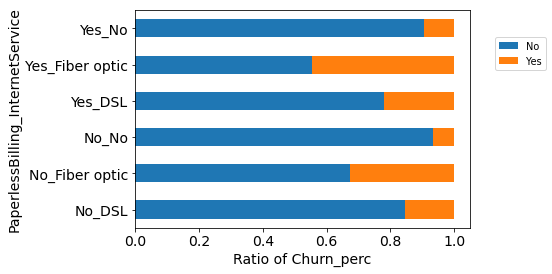

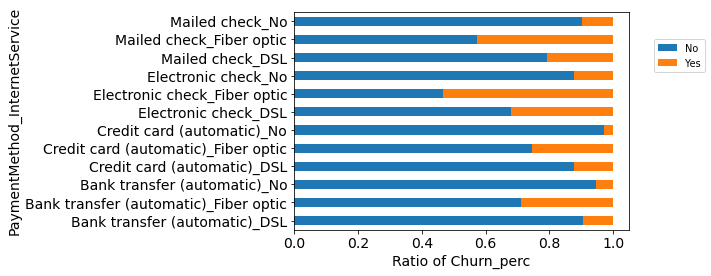

In [47]:
catvscat_hued(obj_cols,'InternetService','Churn')

Irrespective of whether customer has subscription to Fiber optic or DSL InternetService, churn rate is high for those who
- had Month-to-month contract

Churn percentage is high for customers who have Fiber Optic Internet Service
- 1) irrespective of 
    - gender
    - SeniorCitizenship
    - Multiple telephone lines or not
    - subscription to any other streaming premium service
    - opted Paperless Billing or not
    - made manual payment
- 2) Who
    - are not married
    - do not have dependents
    - are subscribed to PhoneService
    - are not subscribed to any other non-streaming premium services
    - opted Paperless Billing

##### 8. OnlineSecurity

In [ ]:
catvscat_hued(obj_cols,'OnlineSecurity','Churn')

Churn percentage is high for customers are not subscribed to OnlineSecurity service
- 1) irrespective of 
    - gender 
    - SeniorCitizenship
    - martial status
    - Dependents status
    - subscription to Phone Serive or multiple telephone services
    - subscription to any other streaming premium services
    - had Month-to-month contract
- 2) Who
    - are subscribed to Fiber optic InternetService
    - are not subscribed to any other non-streaming premium services
    - had Month-to-month contract
    - opted Paperless Billing
    - made manual payment

##### 9. OnlineBackup

In [ ]:
catvscat_hued(obj_cols,'OnlineBackup','Churn')

Irrespective of whether customer is subscribed to OnlineBackup service or not, churn rate is high for those who
- had Month-to-month contract

Churn percentage is high for customers are not subscribed to OnlineBackup service
- 1) irrespective of 
    - gender 
    - multiple telephone services or not
    - subscription to any other streaming premium services
- 2) Who
    - are SeniorCitizens
    - are not married
    - do not have dependents
    - but are subscribed to Phone Service
    - are subscribed to Fiber optic InternetService
    - are not subscribed to any other non-streaming premium services
    - opted Paperless Billing
    - made payment by Electronic check

##### 10. DeviceProtection

In [ ]:
catvscat_hued(obj_cols,'DeviceProtection','Churn')

Irrespective of whether customer is subscribed to DeviceProtection service or not, churn rate is high for those who
- had Month-to-month contract

Churn percentage is high for customers are not subscribed to DeviceProtection service
- 1) irrespective of 
    - gender 
    - subscription to Phone Service
    - multiple telephone services or not
    - subscription to any other streaming premium services
- 2) Who
    - are SeniorCitizens
    - are not married
    - do not have dependents
    - are subscribed to Fiber optic InternetService
    - are not subscribed to any other non-streaming premium services
    - opted Paperless Billing
    - made payment by Electronic check

##### 11. TechSupport

In [ ]:
catvscat_hued(obj_cols,'TechSupport','Churn')

Irrespective of whether customer is subscribed to Premium Tech Support service or not, churn rate is high for those who
- had Month-to-month contract

Churn percentage is high for customers are not subscribed to Premium Tech Support service
- 1) irrespective of 
    - gender 
    - SeniorCitizenship
    - subscription to Phone Service
    - multiple telephone services or not
    - subscription to any other streaming premium services
    - payment method
- 2) Who
    - are not married
    - do not have dependents
    - are subscribed to Fiber optic InternetService
    - are not subscribed to any other non-streaming premium services
    - opted Paperless Billing
    - made payment by Electronic check

##### 12. StreamingTV

In [ ]:
catvscat_hued(obj_cols,'StreamingTV','Churn')

Irrespective of whether customer is subscribed to StreamingTV service or not, churn rate is high for those who
- are SeniorCitizens
- are not married
- do not have dependents
- are subscribed to Fiber optic InternetService
- are not subscribed to any other non-streaming premium services
- had Month-to-month contract
- opted Paperless Billing
- made payment by Electronic check    

##### 13. StreamingMovies

In [ ]:
catvscat_hued(obj_cols,'StreamingMovies','Churn')

Irrespective of whether customer is subscribed to StreamingTV service or not, churn rate is high for those who
- are SeniorCitizens
- are not married
- do not have dependents
- are subscribed to PhoneService
- are subscribed to Fiber optic InternetService
- are not subscribed to any other non-streaming premium services
- had Month-to-month contract
- opted Paperless Billing
- made payment by Electronic check

##### 14. Contract

In [ ]:
catvscat_hued(obj_cols,'Contract','Churn')

Irrespective of whether customer is subscribed with Month-to-month contrat, churn rate is high for those who
- payment method

Churn percentage is high for customers is subscribed with Month-to-month contrat
- 1) irrespective of 
    - gender 
    - SeniorCitizenship
    - martial status
    - dependents or not
    - subscription to Phone Service
    - multiple telephone services or not
    - InternetService with Fiber optic or DSL
    - subscription to DeviceProtection or not
    - subscription to any other streaming premium services
- 2) Who
    - are subscribed to Fiber optic InternetService
    - are not subscribed to any other non-streaming premium services except DeviceProtection
    - opted Paperless Billing
    - made payment by Electronic check

##### 15. PaperlessBilling

In [ ]:
catvscat_hued(obj_cols,'PaperlessBilling','Churn')

Irrespective of whether customer is subscribed for PaperlessBilling, churn rate is high for those who
- InternetService with Fiber optic
- are not subscribed to any other non-streaming premium services
- have Month-to-month contract
- made payment by Electronic check

Churn percentage is high for customers are subscribed for PaperlessBilling
- 1) irrespective of 
    - gender 
    - subscription to Phone Service
    - multiple telephone services or not
    - subscription to any other streaming premium services
- 2) Who
    - are SeniorCitizens
    - are not married
    - do not have dependents

##### 16. PaymentMethod

In [ ]:
catvscat_hued(obj_cols,'PaymentMethod','Churn')

Irrespective of whether customer made manual payment or not, churn rate is high for those who
- have Month-to-month contract

Churn percentage is high for customers made payment by Electronic check
- 1) irrespective of 
    - gender 
    - SeniorCitizenship
    - martial status
    - subscription to Phone Service
    - multiple telephone services or not
    - InternetService with Fiber optic
    - subscription to any other streaming premium services
- 2) Who
    - do not have dependents
    - are not subscribed to any other non-streaming premium services
    - opted Paperless billing

## Inferences:

From data Visualization techniques, we understood that the following features, individually or combined, distinguish customers who left the company from those who are not (churn / no churn)

    1) SeniorCitizen - yes
    2) Partners - no
    3) Dependents - no
    4) InternetService - Fiber optic
    5) Subscription to non-streaming premium services (OnlineSecurity, OnlineBackup, DeviceProtection, Premium TechSupport)
    6) Contract - Month-to-month
    7) Paperless Billing - yes
    8) payment by Electronic check
------